# Project: TMDB-Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing <b>TMDB Movies Data</b> which contains information about movies, including user ratings and revenue, and we will be searching for some trends that affect the revenue.

In [42]:
# Here we import the libraries we will use in the analysis
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [43]:
# Here we load the data and display the first few rows to get a sense of what we are working whith 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [44]:
# Here we display the shape of the data
df.shape

(10866, 21)

In [45]:
# Here we get some summary statistics about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [46]:
# Here we get some information about the data types of the columns and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
# Here we change the data type of the release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\Samir\AppData\Local\Temp\ipykernel_19812\3544538257.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [48]:
# Here we delete columns that are not useful for out analysis
df.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

In [49]:
# Here we display the first few rows of the data frame to see the changes
df.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
# creating a function to visualize the data
def visualize_data(data):
    # Here we plot histograms for the data
    data.hist(figsize=(10, 10));

We have created the function above to <b>reduce redundancy and improve readability</b>

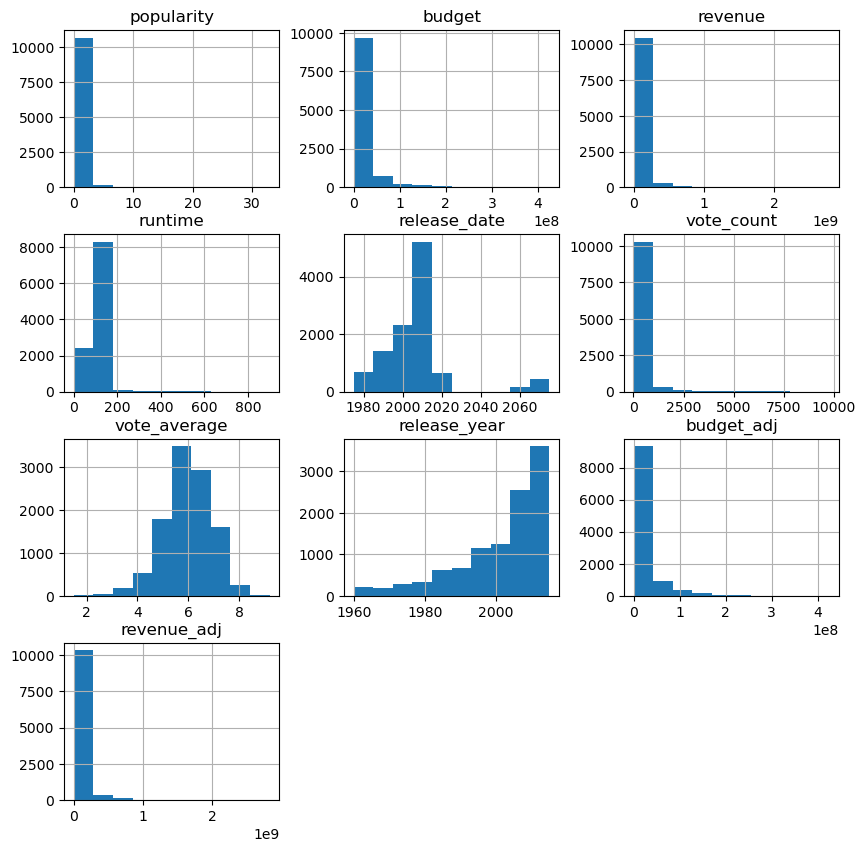

In [51]:
# Here we visualize the distribution of the data to get a better anderstanding of the data
# by plotting histograms of the columns
visualize_data(df)

>From the histograms above we can say that the data has a variety of distributions as some are skewed to the right, some are skewed to the left and some are normally distributed.


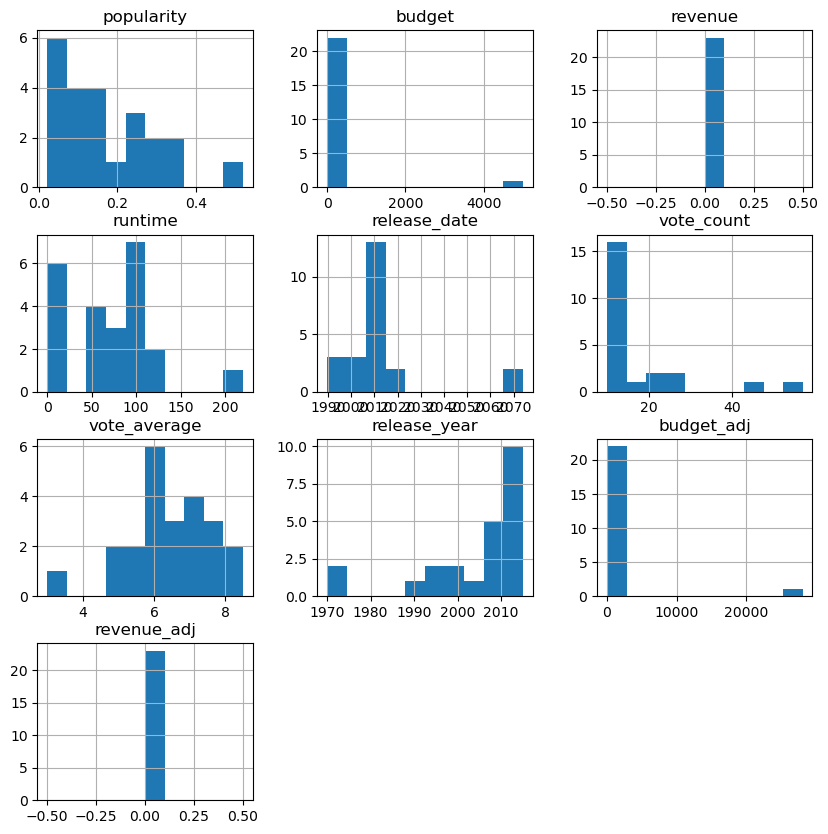

In [52]:
# Here we visualize the distribution of the rows where the genres are missing better anderstanding of the data
# by plotting histograms of the columns
visualize_data(df[df.genres.isnull()])

>From the histograms above we can say that the data is not normally distributed.

In [53]:
# Here we drop the rows where the genres are missing
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10843 non-null  float64       
 1   budget        10843 non-null  int64         
 2   revenue       10843 non-null  int64         
 3   runtime       10843 non-null  int64         
 4   genres        10843 non-null  object        
 5   release_date  10843 non-null  datetime64[ns]
 6   vote_count    10843 non-null  int64         
 7   vote_average  10843 non-null  float64       
 8   release_year  10843 non-null  int64         
 9   budget_adj    10843 non-null  float64       
 10  revenue_adj   10843 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 1016.5+ KB


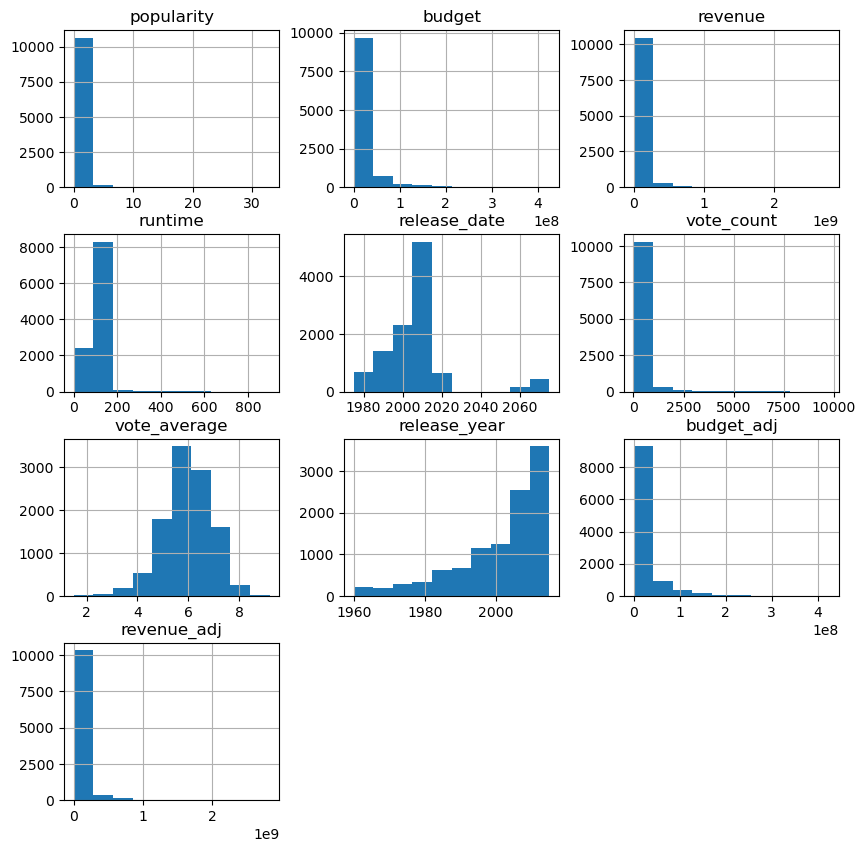

In [54]:
# Here we visualize the distribution of the data to make sure that removing the rows with missing genres did not make a big difference
# by plotting histograms of the columns
visualize_data(df)

>From the histograms above we can say that the changes we made to the dataset did not make a big differece to the distribution of the data. so we can say that dropping the rows with missing geres was a good dicision.

<a id='eda'></a>
## Exploratory Data Analysis

### Does the Genres affect the Adjusted Revinue?

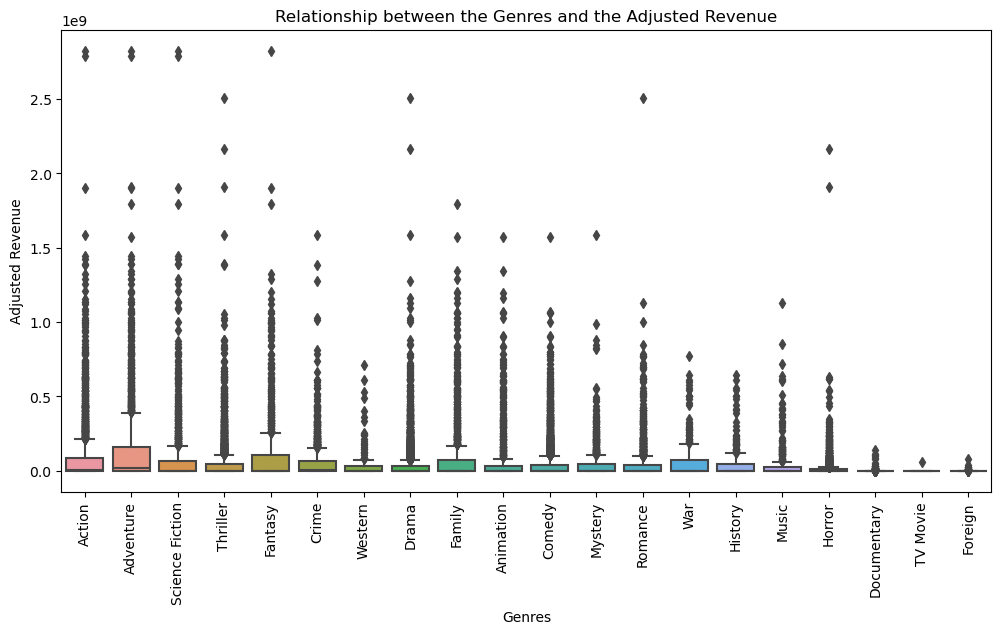

In [55]:
# Split the 'genres' column as it contains multiple genres per entry
df['genres'] = df['genres'].str.split('|')
df = df.explode('genres')

# Creating a box plot as it is a good way to visualize the relationship between the Genres and the Adjusted Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='revenue_adj', data=df)
plt.title('Relationship between the Genres and the Adjusted Revenue')
plt.xlabel('Genres')
plt.ylabel('Adjusted Revenue')
plt.xticks(rotation=90)
plt.show()

>From the boxplot above, we can say that the movie genres do affect their revenue, and the movies that <b>are most likely to get less revenue<b>are associated with these genres: <ul><li>Documentary</li> <li>TV Movie</li> <li>Foreign</li><ul>

### Does the Adjusted Budget effect the Adjusted Revenue

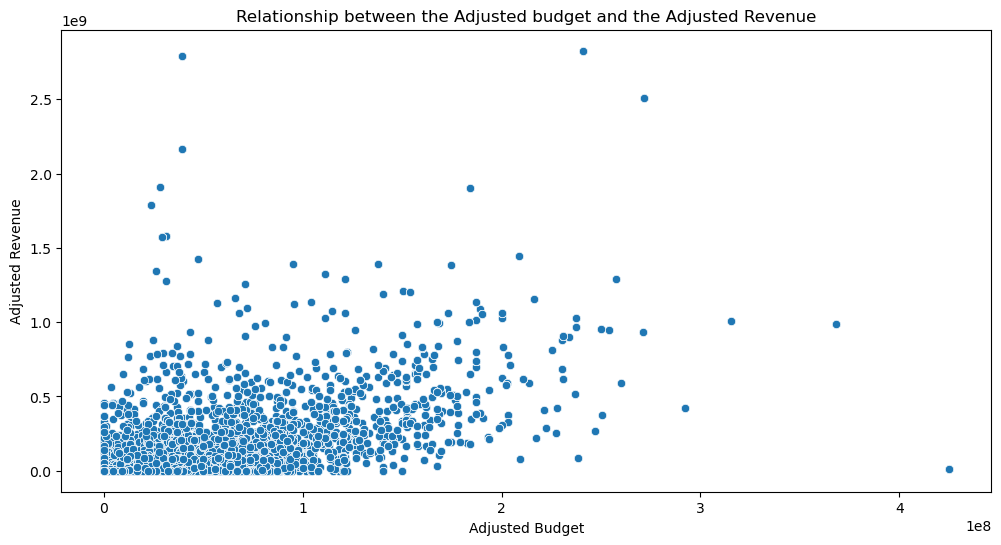

In [56]:
# creating a scatter plot as it is a good way to visualize the relationship between the Adjusted Budget and the Adjusted Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget_adj', y='revenue_adj', data=df)
plt.title('Relationship between the Adjusted budget and the Adjusted Revenue')
plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue')
plt.show()

>From the scatter plot above, we can say that the Budget used to make a movie is most likely to have a clear impact on its revenue, but for sure there are some cases where it does not have any clear impact on its revenue.

### Does the Runtime effect the Adjusted Revenue

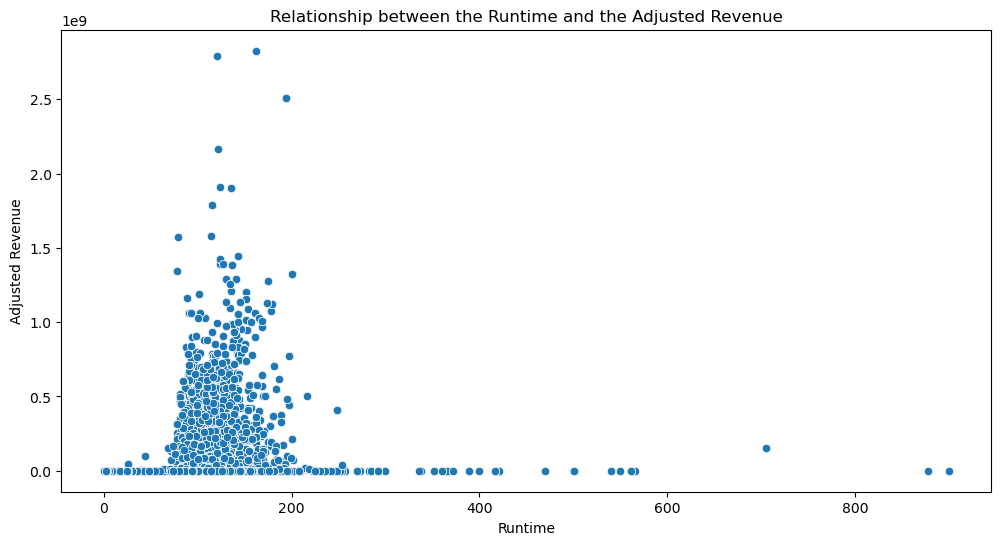

In [57]:
# creating a scatter plot as it is a good way to visualize the relationship between the Runtime and the Adjusted Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime', y='revenue_adj', data=df)
plt.title('Relationship between the Runtime and the Adjusted Revenue')
plt.xlabel('Runtime')
plt.ylabel('Adjusted Revenue')
plt.show()

In [58]:
# Here we calculate the average of the 'runtime' column 
# for getting a specific value which is not possible to get from the scatter plot above
print("The average of the 'runtime' column is: ", np.mean(df['runtime']))

The average of the 'runtime' column is:  102.79840504451039


>From the scatter plot above, we can say that the runtime does not have a big affect on the movie revenue. However, most of the movies' Runtimes are less than or equal to 200 and its average is: 102.79840504451039, and movies with runtimes near to this value are definitely the most likely to get higher revenue.

<a id='conclusions'></a>
## Conclusions

>In this project, we have dived into: <ul><li>The Cleaning phase where we have cleaned the data as much as possible to fit our analysis goal in the best way.</li><li>The Exploratory phase where we have answered three questions that show the relationship between three independent variables: <ul><li>Genres</li><li>Adjusted Budget</li><li>Runtime</li></ul>and one dependent variable: <ul><li>Adjusted revenue</li></ul></li></ul> 
>And these were the <b>Main findings:</b> <ul><li>Certain genres tend to have higher adjusted revenues for example: -'Action' -'Adventure', and some other genres tend to have less adjusted reveues for example: -'Documentary'. This suggests that <b>movies associated with certain genres may generally perform better in terms of revenue</b>.</li><li>From the positive correlation between the adjusted budget and the adjusted revenue we can say that generally <b>movies with higher budgets tend to generate higher revenues</b>, but for sure where the budget has been spent makes a big difference.</li><li>Most of the movies runtimes are less than or equal to 200 and they are the most likely to get higher revenue</li></ul>
>I think this project needs more <b>Additional research</b> to enhance its quality for example:<ul><li>Analyzing the impact of star power, director reputation, or marketing strategies.</li></ul>
>But for sure there is at least one big <b>limit</b> that can make all of this work have no meaning which is:<ul><li>if there was any <b>Inaccurate data</b></li></ul>
>### That is all. I hope you liked my project.

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295